In [1]:
import numpy as np
import os.path as osp
from os import getcwd
import sys
data_factory_dir = "../src/"
if osp.exists(data_factory_dir):
    sys.path.insert(0, data_factory_dir)
    from data_factory import combine, preprocess
else:
    print("Folder not exists: %s"%data_factory_dir)
    print(getcwd())
from nltk import FreqDist
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams.update({'font.size': 22})
from nltk import word_tokenize

# Preprocess

In [2]:
# set up
train_data_dir = '../data/train/'
train_topics = ['biology', 'cooking', 'crypto', 'diy', 'robotics', 'travel']
train_files = [osp.join(train_data_dir, t+'.csv') for t in train_topics]
train_dict = dict(zip(train_topics, train_files))
test_dict = {'physics': '../data/test/test.csv'}
#
# # load-transform-save
df = combine(train_dict, test_dict)
df = preprocess(df)

Loaded data.
Loaded data.
Removed html tags.
Combined question title and content.
Removed extra spaces and new lines.


In [42]:
topics_dict = dict(zip(range(0, 7), train_topics + ['physics']))
df['topic'] = df['qid'].apply(lambda x: topics_dict[int(x.split("-")[0])])
topics_counter = Counter(list(df['topic']))

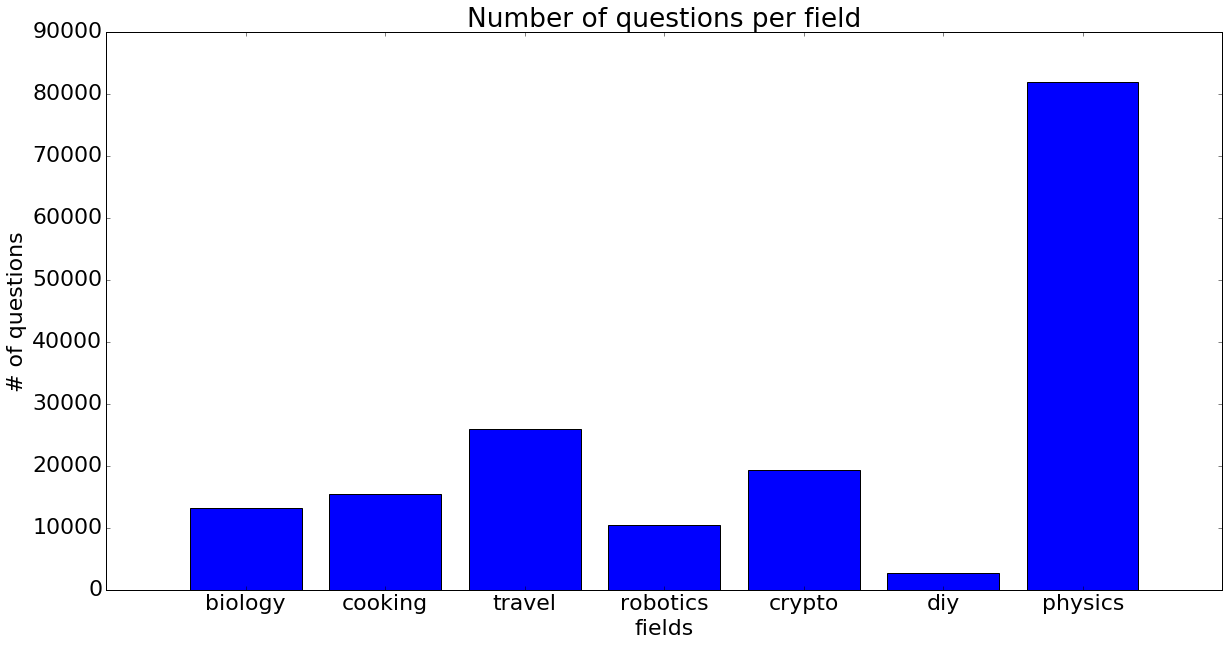

In [34]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
counts = topics_counter.values()
names = topics_counter.keys()
x_coor = np.arange(len(names))
ax.bar(x_coor, counts, align='center')
ax.xaxis.set_major_locator(plt.FixedLocator(x_coor))
ax.xaxis.set_major_formatter(plt.FixedFormatter(names))
ax.set_title("Number of questions per field")
ax.set_ylabel("# of questions")
ax.set_xlabel("fields")
plt.show()

In [35]:
df.columns

Index([u'qid', u'combined_text', u'tags'], dtype='object')

In [ ]:
df['length'] = df['combined_text'].apply(lambda x: len(word_tokenize(x, "english")))

In [49]:
df.head()

,qid,combined_text,tags,length,topic
0,0-1,What is the criticality of the ribosome bindin...,ribosome binding-sites translation synthetic-b...,76,biology
1,0-2,How is RNAse contamination in RNA based experi...,rna biochemistry,47,biology
2,0-3,Are lymphocyte sizes clustered in two groups? ...,immunology cell-biology hematology,75,biology
3,0-4,How long does antibiotic-dosed LB maintain goo...,cell-culture,107,biology
4,0-5,Is exon order always preserved in splicing? Ar...,splicing mrna spliceosome introns exons,52,biology


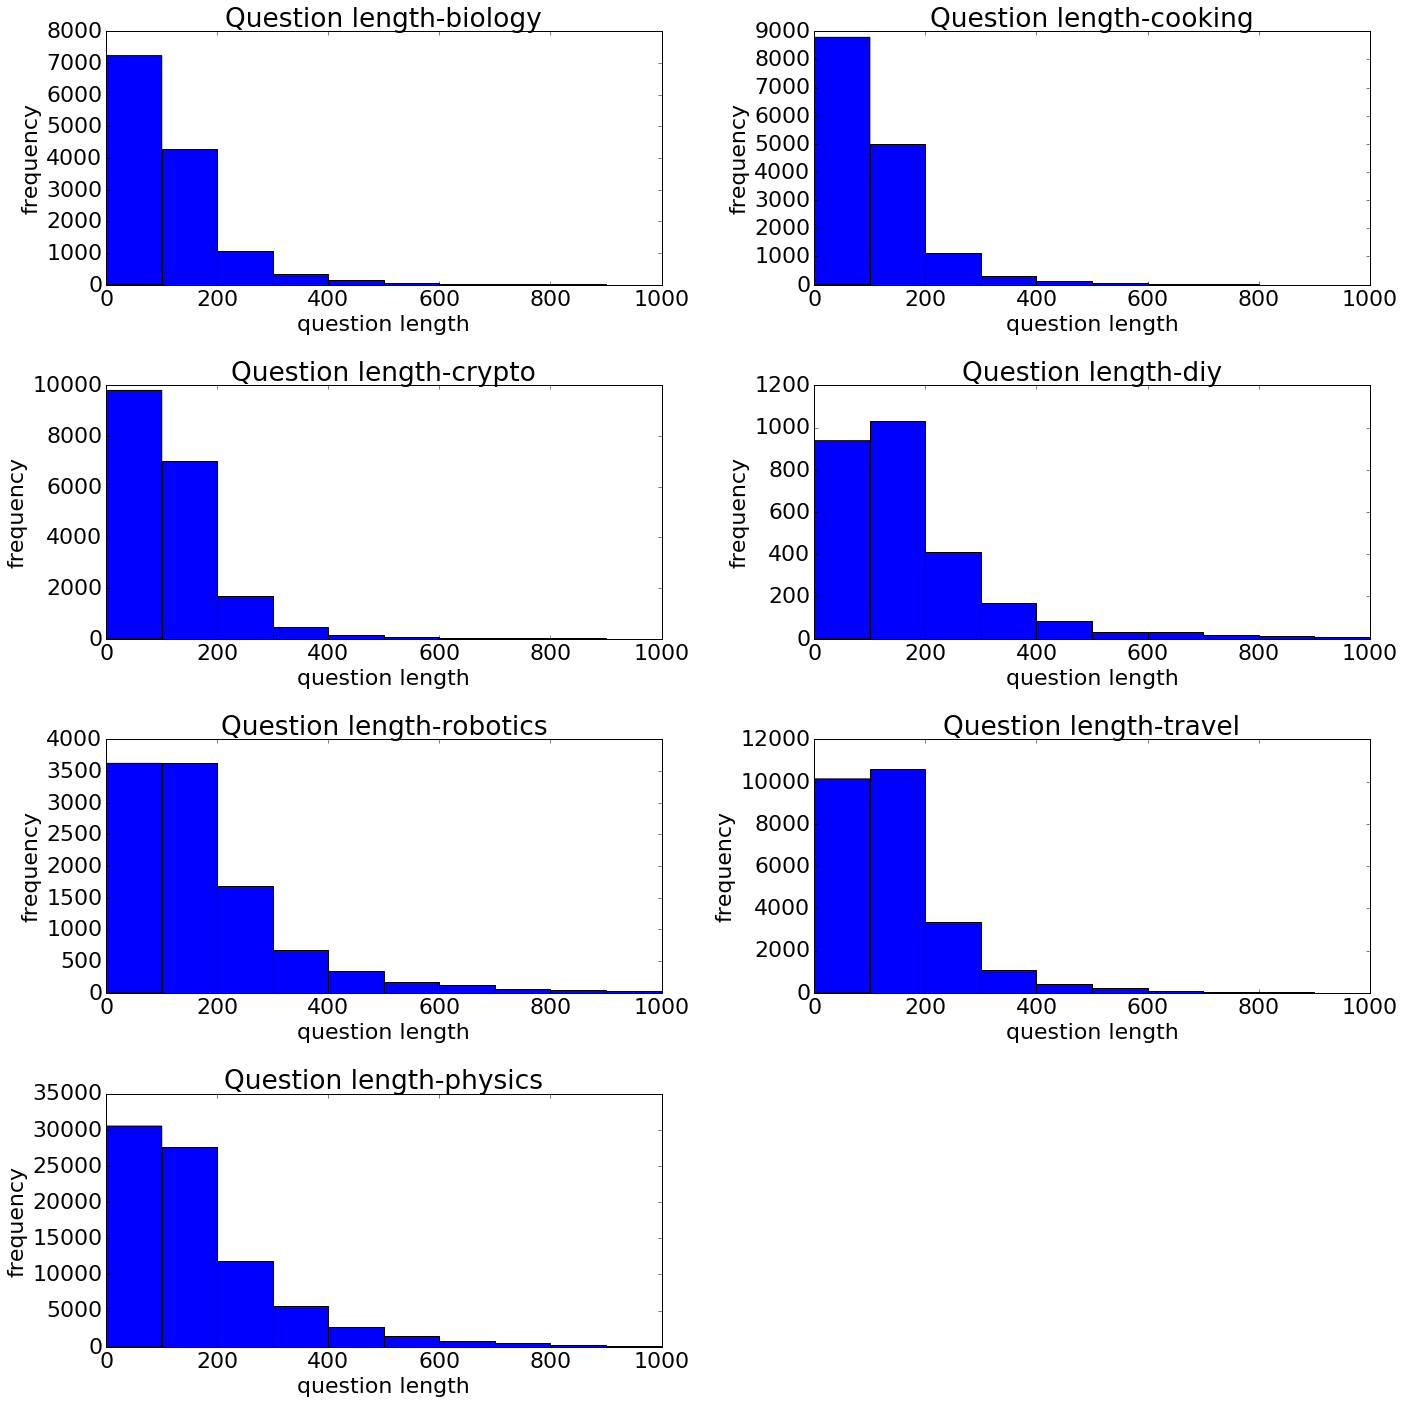

In [48]:
fig = plt.figure(figsize=(20, 20))
for i in range(0, len(topics_dict)):
    topic = topics_dict[i]
    numbers = list(df.loc[df['topic'] == topic, :]['length'])
    ax = fig.add_subplot(420+i+1)
    ax.hist(numbers,range=(0, 1000))
    ax.set_title("Question length-%s"%topic)
    ax.set_ylabel("frequency")
    ax.set_xlabel("question length")
plt.tight_layout()
plt.show()

# Baseline model

In [5]:
thres = 1000
df_subset = df.loc[df["length"] < thres, :].reset_index()
data = list(df_subset['combined_text'])
labels = list(df_subset['qid'].apply(lambda x: int(x.split("-")[0])))

KeyError: 'length'

In [4]:
data[:5]

[u'What is the criticality of the ribosome binding site relative to the start codon in prokaryotic translation? In prokaryotic translation, how critical for efficient translation is the location of the ribosome binding site, relative to the start codon?\nIdeally, it is supposed to be -7b away from the start. How about if it is -9 bases away or even more? Will this have an observable effect on translation?',
 u'How is RNAse contamination in RNA based experiments prevented? Does anyone have any suggestions to prevent RNAse contamination when working with RNA?\nI tend to have issues with degradation regardless of whether I use DEPC treated / RNAse free water and filtered pipette tips.',
 u'Are lymphocyte sizes clustered in two groups? Tortora writes in Principles of Anatomy and Physiology:\n\nLymphocytes may be as small as 6\u20139 \u03bcm in diameter or as large as 10\u201314 \u03bcm in diameter.\n\nThose ranges are quite close to each others. Should the above be taken to mean that lymph